# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  Draw a small sample of size 10 from the data and repeat both tests. 
    <ul>
    <li> Which one is the correct one to use? 
    <li> What do you notice? What does this tell you about the difference in application of the $t$ and $z$ statistic?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

1)Is the distribution of body temperatures normal?
    Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population. 
    
ANswer: Yes it is normal

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import scipy
import pylab
import scipy.stats as stats
from statsmodels.stats.weightstats import DescrStatsW, CompareMeans, ttest_ind, ztest, zconfint
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import kurtosis

df = pd.read_csv('data/human_body_temperature.csv')

In [3]:
# Your work here.df.head

### Is the distribution of body temperatures normal?
    Although this is not a requirement for CLT to hold (read CLT carefully), 
    it gives us some peace of mind that the population may also be normally distributed
    if we assume that this sample is representative of the population.    
Answer: Yes. It is normal. Based on the Normal curve distribution show below, the ecdf mapping and the prob distribution plot, it is very clear that the distribution of the body temperature is normal with a skew of -0.004 and kurtosis of 0.7.

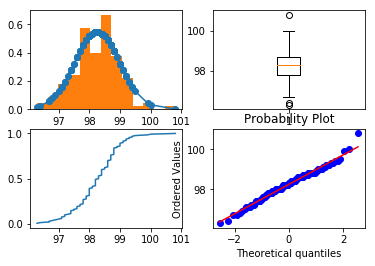

Chi-Sq Val:2.70380143332,p-value=0.258747986349, mean: 98.2492307692, median=98.3, skew=-0.004367976879198334,kurtosis=0.7049597854114715


In [4]:
h=sorted(df.temperature)
mn=np.mean(h)
std=np.std(h)

plt.subplot(221)
fit = scipy.stats.norm.pdf(h, np.mean(h), np.std(h))  #this is a fitting indeed
_=plt.plot(h,fit,'-o')
_=plt.hist(h,bins='auto',normed=1)

plt.subplot(222)
_=plt.boxplot(h)

plt.subplot(223)
def ecdf(data):
    x=np.sort(data)
    y=np.arange(1,(len(data)+1))/len(data)
    return x, y    
x,y=ecdf(h)
_=plt.plot(x,y)

plt.subplot(224)
stats.probplot(h, dist="norm", plot=pylab)
plt.show()

a,b=scipy.stats.mstats.normaltest(h,axis=0)
c=np.mean(h)
d=np.median(h)
e=skew(h)
f=kurtosis(h)
print('Chi-Sq Val:%s,p-value=%s, mean: %s, median=%s, skew=%s,kurtosis=%s'%(a,b,c,d,e,f) )


### Q2) Is the sample size large? Are the observations independent?
    Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply. 

Answer: Yes. Sample size is large (>30) which is large enough for a good statistic test. The coorelation coefficeint shown below is 1.0 which means that the observations are independent. If you look at the SEM value above, it is 0.06.So the standard error deviates only by 0.06. The 95% concfidence Interval values lie between 98.13 and 98.36 which is very close to the observed mean of 98.24. Finally Probability of finding a value <= observed mean is 0.49 which is acceptable.

Gnnerating Bootstraps samples and testing independence of data 

In [19]:
np.corrcoef(h)

1.0

In [165]:
def bootstrap_replicate_1d(data, func):
    return func(np.random.choice(data, size=len(data)))

def draw_bs_reps(data, func, size=1):
    """Draw bootstrap replicates."""

    # Initialize array of replicates: bs_replicates
    bs_replicates = np.empty(size)

    # Generate replicates
    for i in range(size):
        bs_replicates[i] = bootstrap_replicate_1d(data,func)

    return bs_replicates
df_rep=draw_bs_reps(df.temperature,np.mean,10000)

In [188]:
mean=np.mean(df.temperature)
df_rep_mn=np.mean(df_rep)
STD=np.std(df_rep)
SEM2=np.std(df_rep)/np.sqrt(len(df_rep))
conf_ind=np.percentile(df_rep,[2.5,97.5])
p=np.sum(df_rep<=mean)/10000
print('Mean: %s,Replicate Mean: %s,Standard Deviation: %s,Standard Error of the Mean: %s,5 Percent Confidence Interval: %s,Probability: %s'%(mean,df_rep_mn, STD, SEM2,conf_ind,p))

Mean: 98.24923076923078,Replicate Mean: 98.2489624615,Standard Deviation: 0.0636933525488,Standard Error of the Mean: 0.000636933525488,5 Percent Confidence Interval: [ 98.12307692  98.37307692],Probability: 0.5029


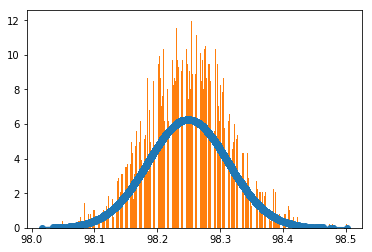

In [185]:
h1=sorted(df_rep)
mn1=np.mean(h1)
std2=np.std(h2)

fit = scipy.stats.norm.pdf(h1, np.mean(h1), np.std(h1))  #this is a fitting indeed
_=plt.plot(h1,fit,'-o')
_=plt.hist(h1,bins=1000,normed=1)
#_=plt.plot(mean,marker='.')
plt.show()

### Is the true population mean really 98.6 degrees F?
    Would you use a one-sample or two-sample test? Why?
    In this situation, is it appropriate to use the tt or zz statistic?
    Now try using the other test. How is the result be different? Why? 

### Q1) Is the true population mean really 98.6 degrees F?
No. It is:  98.249~98.3  with a standard error of 0.055 

In [103]:
s1=np.random.choice(h,140)
Mn=np.mean(s1)
SE=np.std(s1)/np.sqrt(len(s1))
print('Mean:%s,Margin of Error:%s'%(Mn,SE))

Mean:98.3592857143,Margin of Error:0.0684962119359


### Q2) Would you use a one-sample or two-sample test? Why?
We would use one Sample test because we don't have two or more samples sfrom two different times. 
One major requirement for two sample data tests is that the two data sets have to be independent 
which does not apply here as we are provided with only one data set and 
there is no way to get a second independent data set from a different time period. So this is a one-sample test.

### Q3) In this situation, is it appropriate to use the tt or zz statistic?
We have a sample of size>30 with a known standard deviation. So ideally it should be Z test. 
If the sample size was < 30, then the t-test is more appropriate.

### Q4) Now try using the other test. How is the result be different? Why? 
T-test gives a T-statistic of 0.10 and probability of 0.91 which shows that we have very strong case NOT to reject out NULL hypothesis that the sample mean is NOT different from the observed mean.The high value of P and low value of T statistic might be because of the sample might be very close to the center of the normal curve.

Z-value is 1.37 and the p-value is 0.17 indicate that with 95% CI (alpha= 0.05) indicate that we cannot reject the Null hypothesis that the two samples are NO different. 

In [23]:
s1=np.random.choice(h,40)
scipy.stats.ttest_ind(s1,h, axis=0, equal_var=True)

Ttest_indResult(statistic=-0.10937316450777729, pvalue=0.91303705058184881)

In [22]:
ztest(s1,h, value=0, alternative='two-sided', usevar='pooled', ddof=1.0)

(-1.3705340003684117, 0.17052026938188225)

### Draw a small sample of size 10 from the data and repeat both tests.
    Which one is the correct one to use?
    What do you notice? What does this tell you about the difference in application of the tt and zz statistic?
For a sample size of 10, we are not seeing any significant difference between the test statistic and the p values. Infact they are very close to each other: 0.16, 0.86. 

In [138]:
s1=np.random.choice(h,10)
print('H Stdv:',np.std(h))
print('S1 Stdv:', np.std(s1))

print(scipy.stats.ttest_ind(s1,h, equal_var='False'))
print(ztest(s1,h, value=0,alternative='two-sided',ddof=1.0))

H Stdv: 0.730357778905
S1 Stdv: 0.552177507691
Ttest_indResult(statistic=-0.16505282778011626, pvalue=0.86914393473555296)
(-0.16505282778011626, 0.86890240165292276)


### At what temperature should we consider someone's temperature to be "abnormal"?
    Start by computing the margin of error and confidence interval. 
With in a confidence interval of 99%, any temperature less than 96.48 or greater than 99.971 can be considred be abnormal with a margin of error of 0.14 

In [55]:
CI=np.percentile(h,[1,99])
ME=2.33*(np.std(h)/np.sqrt(len(h)))

In [54]:
print(CI,ME)

[ 96.487  99.971] 0.14925191224


### Is there a significant difference between males and females in normal temperature?
    What test did you use and why?
We used Z statistic because the sample size is greater than>65 and the stadard deviation is known. The Z statistic is -2.28 and the P vlaue is 0.02 (>0.01). So we can reject the null hypothesis that the mean temperature between males and females is not same. 

In [186]:
print('Mean: %s,Standard Deviation: %s,Standard Error of the Mean: %s,5 Percent Confidence Interval: %s,Probability: %s'%(mean, STD, SEM2,conf_ind,p))

Mean: 98.24923076923078,Standard Deviation: 0.0636933525488,Standard Error of the Mean: 0.000636933525488,5 Percent Confidence Interval: [ 98.08076154  98.41153846],Probability: 0.5029


In [92]:
df_m=sorted(df.temperature[df.gender=='M'])
df_f=sorted(df.temperature[df.gender=='F'])

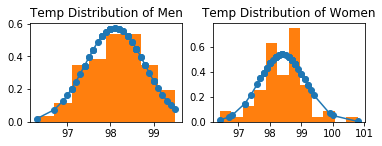

In [100]:
plt.subplot(221)
fit = scipy.stats.norm.pdf(df_m, np.mean(df_m), np.std(df_m))  #this is a fitting indeed
_=plt.plot(df_m,fit,'-o')
_=plt.hist(df_m,bins='auto',normed=1)
plt.title('Temp Distribution of Men')

plt.subplot(222)
fit = scipy.stats.norm.pdf(df_f, np.mean(df_f), np.std(df_f))  #this is a fitting indeed
_=plt.plot(df_f,fit,'-o')
_=plt.hist(df_f,bins='auto',normed=1)
plt.title('Temp Distribution of Women')
plt.show()

In [189]:
m1=np.std(df_m)
m2=np.std(df_f)
p1=np.percentile(df_m,[1.5,97.5])
p2=np.percentile(df_f,[1.5,97.5]) 
t,p1=scipy.stats.ttest_ind(df_m,df_f, axis=0, equal_var=False)
z,p2=ztest(df_m,df_f,value=0, alternative='two-sided', ddof=1.0)

print('Male Obs Mean: %s,Female Obs Mean: %s,95 CI Values for Males Temp: %s, 95 CI Values for Females Temp: %s,T test: %s, P-value(T test): %s,Z-Test:%s, P-value(Z test):%s'%(m1,m2,p1,p2,t,p1,z,p2))

Male Obs Mean: 0.693359884183,Female Obs Mean: 0.737746448643,95 CI Values for Males Temp: 0.0239382641829, 95 CI Values for Females Temp: 0.0222873607607,T test: -2.28543453817, P-value(T test): 0.0239382641829,Z-Test:-2.28543453817, P-value(Z test):0.0222873607607


### Write a story with your conclusion in the context of the original problem?
Based on our analysis the overall human temmperature observations are normally distributed wth an mean temperature of 98.4.We created 1000 Bootstrap replicates from the human body observations and got the following statistics.
The mean temperature of the Human temperature is 98.249 and it varies between 98.121 and 98.37 which is the 5% Confidence Internval. Mean error is 0.00064, so the actual 5% Confidence Interval values  vary between 98.1216 and 98.3726.
The probablility of the Bootstrap samples having means less than the observed mean is 0.502 which is acceptable. Therefore we conclude that we cannot reject the Hypothesis that samples have the same mean temperature as the obs